# Generate histogram of releases
Code Author: Sahar El Abbadi
Date started: 2023-03-14
Date last edited: 2023-03-14

Notebook objective: to generate a histogram of Stanford releases, categorizing release by type:
- True Positive
- True Negative
- False Negative
- False Positive
- Missing data - overpass recorded in field but not as an overpass by the team
- Stanford Filtered
- Operator Filtered

In [11]:
# Setup
# Imports
from methods_source import load_overpass_summary, load_summary_files, make_histogram_bins, classify_confusion_categories,find_missing_data
import numpy as np
import pandas as pd



## Evaluate data that passes all QC filters

Select overpasses that pass both Stanford and Operator QC criteria. Generate dataframes for true positive, false positive, true negative, and false negative

In [12]:
# Load operator overpass data
cm_reported = load_overpass_summary(operator='Carbon Mapper', stage=1, strict_discard=False)

# Pass all QC filter
cm_qc_pass = cm_reported.query('qc_summary == "pass_all"')

# Select non-zero releases detected by operator
cm_tp, cm_fp, cm_tn, cm_fn = classify_confusion_categories(cm_qc_pass)


In [13]:
# Create bins for plot

threshold = 50
n_bins = 10

cm_count_tp = make_histogram_bins(cm_tp, threshold, n_bins)
cm_count_fp = make_histogram_bins(cm_fp, threshold, n_bins)
cm_count_fn = make_histogram_bins(cm_fn, threshold, n_bins)
cm_count_tn = make_histogram_bins(cm_tn, threshold, n_bins)

In [14]:
# Filtered by Stanford
cm_su_qc_fail = cm_reported.query('stanford_kept == False')
cm_count_su_fail = make_histogram_bins(cm_su_qc_fail, threshold, n_bins)

In [15]:
# Filtered by Carbon Mapper
# if qc_summary is 'fail_operator', this means it passed Stanford QC but not operator QC
cm_op_qc_fail = cm_reported.query('qc_summary == "fail_operator"')
cm_count_op_fail = make_histogram_bins(cm_op_qc_fail, threshold, n_bins)

In [16]:
# Identify data points where Stanford conducted a release
# Find data points where we have a flightradar overpass but we do not have an operator overpass

cm_meter_raw, ghg_meter_raw, kairos_meter_raw, mair_meter_raw = load_summary_files()

cm_missing = find_missing_data(cm_meter_raw)
cm_count_missing = make_histogram_bins(cm_missing, threshold, n_bins)

In [26]:
print(cm_count_tn)

   bin_median  n_data_points
0         2.5              8
1         7.5              0
2        12.5              0
3        17.5              0
4        22.5              0
5        27.5              0
6        32.5              0
7        37.5              0
8        42.5              0
9        47.5              0


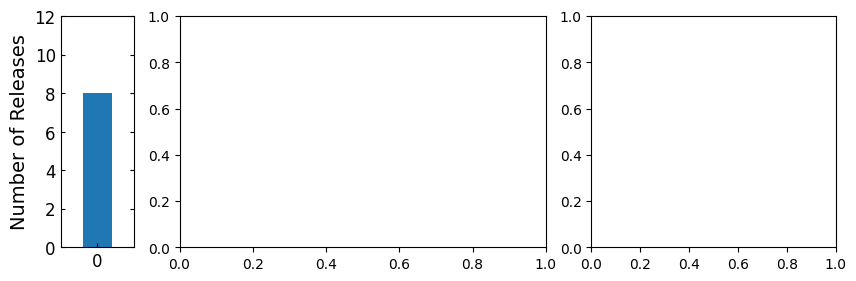

In [60]:
# Make plot of true negatives
import matplotlib.pyplot as plt

fig, [ax1, ax2, ax3] = plt.subplots(1,3,
                                    figsize=(10, 3),
                                    gridspec_kw={'width_ratios': [0.6, 3, 2]})
ax1.bar(0, cm_count_tn.n_data_points,
        width = 0.2)

# Add more room on top and bottom
ax1.set_ylim([0, 12])
ax1.set_xlim([-0.25, 0.25]) # set to 12 for now

# Axes formatting and labels
ax1.set_xticks([0])
# ax1.set_yticklabels([1, 2, 4, 6, 8, 10], fontsize=11)
# ax1.set_xlabel('Methane Release Rate (kgh)', fontsize=14)
ax1.set_ylabel('Number of Releases', fontsize=14)
ax1.tick_params(direction='in', right=False, top=False)
ax1.tick_params(labelsize=12)
ax1.minorticks_on()
ax1.tick_params(labelbottom=True, labeltop=False, labelright=False, labelleft=True)
ax1.tick_params(direction='in', which='minor', length=3, bottom=False, top=False, left=False, right=False)
ax1.tick_params(direction='in', which='major', length=3, bottom=True, top=False, left=True, right=True)

# Set axes and background color to white
ax1.set_facecolor('white')
ax1.spines['top'].set_color('black')
ax1.spines['left'].set_color('black')
ax1.spines['right'].set_color('black')
ax1.spines['bottom'].set_color('black')

# Next: 0 to 50 kgh
# Then 50 to 2000 kgh

In [38]:
print(np.linspace(0, 10, 6))

[ 0.  2.  4.  6.  8. 10.]
